# <center> Algorithmic Trading Strategy (BTC-USD)
---

In [41]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use("classic")

In [42]:
data = pd.read_csv("BTC-USD.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-24,443.091003,458.455994,443.076996,454.984985,454.984985,57157200
1,2015-12-25,454.855011,458.304993,452.075012,455.653015,455.653015,39078500
2,2015-12-26,455.756012,457.489014,405.760010,417.273987,417.273987,116166000
3,2015-12-27,416.514008,424.006989,408.882996,422.822998,422.822998,53591200
4,2015-12-28,423.342987,429.769012,418.480988,422.278992,422.278992,49638600
...,...,...,...,...,...,...,...
1822,2020-12-19,23132.865234,24085.855469,22826.472656,23869.832031,23869.832031,38487546580
1823,2020-12-20,23861.765625,24209.660156,23147.710938,23477.294922,23477.294922,37844228422
1824,2020-12-21,23474.455078,24059.982422,22159.367188,22803.082031,22803.082031,45852713981
1825,2020-12-22,22794.039063,23789.902344,22430.605469,23783.029297,23783.029297,44171632681


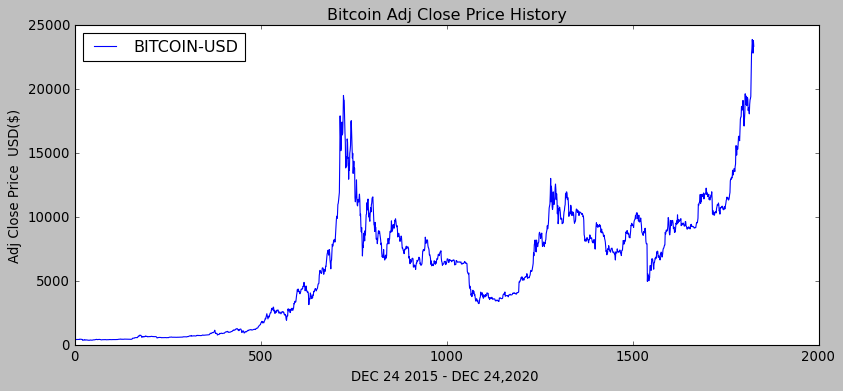

In [43]:
plt.figure(figsize=(12, 5))
plt.plot(data['Adj Close'], label='BITCOIN-USD')
plt.title('Bitcoin Adj Close Price History')
plt.xlabel("DEC 24 2015 - DEC 24,2020 ")
plt.ylabel("Adj Close Price  USD($)")
plt.legend(loc="upper left")
plt.show()

## Creating a Simple moving average with a 30 day window

In [44]:
sma30 = pd.DataFrame()
sma30['Adj Close'] = data['Adj Close'].rolling(window=30).mean()
sma30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1822,19212.984050
1823,19374.850065
1824,19513.545052
1825,19693.979297


## Creating a Simple moving average with a 100 day window

In [45]:
sma100 = pd.DataFrame()
sma100['Adj Close'] = data['Adj Close'].rolling(window=100).mean()
sma100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1822,14568.534600
1823,14699.298399
1824,14822.907510
1825,14957.500244


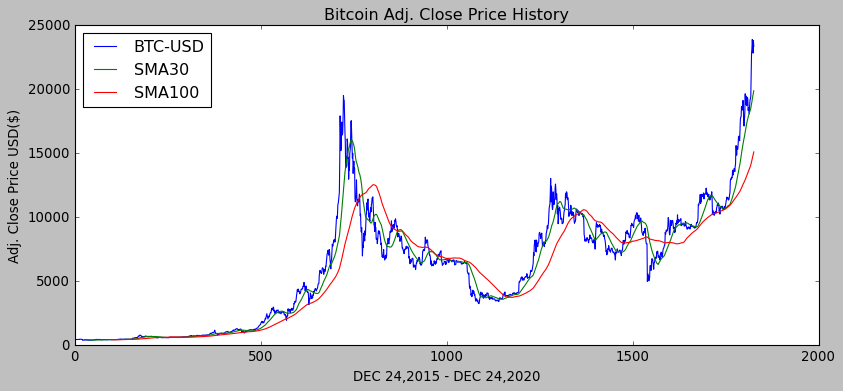

In [46]:
plt.figure(figsize=(12,5))
plt.plot(data['Adj Close'], label='BTC-USD')
plt.plot(sma30['Adj Close'], label='SMA30')
plt.plot(sma100['Adj Close'], label='SMA100')
plt.title("Bitcoin Adj. Close Price History")
plt.xlabel('DEC 24,2015 - DEC 24,2020')
plt.ylabel('Adj. Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [47]:
data2 = pd.DataFrame()
data2['BTC'] =data['Adj Close']
data2['SMA30'] = sma30['Adj Close']
data2['SMA100'] = sma100['Adj Close']
data2

,BTC,SMA30,SMA100
0,454.984985,NaN,NaN
1,455.653015,NaN,NaN
2,417.273987,NaN,NaN
3,422.822998,NaN,NaN
4,422.278992,NaN,NaN
...,...,...,...
1822,23869.832031,19212.984050,14568.534600
1823,23477.294922,19374.850065,14699.298399
1824,22803.082031,19513.545052,14822.907510
1825,23783.029297,19693.979297,14957.500244


## Function to signal when to buy or sell stock

In [48]:
def buySell(data2):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(data2)):
    if data2['SMA30'][i] > data2['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data2['BTC'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data2['SMA30'][i] < data2['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data2['BTC'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
  return(sigPriceBuy, sigPriceSell)

## Visualize the data and strategy to buy and sell stock

In [49]:
buySell = buySell(data2)
data2['Buy Signal Price'] = buySell[0]
data2['Sell Signal Price'] = buySell[1]
data2

,BTC,SMA30,SMA100,Buy Signal Price,Sell Signal Price
0,454.984985,NaN,NaN,NaN,NaN
1,455.653015,NaN,NaN,NaN,NaN
2,417.273987,NaN,NaN,NaN,NaN
3,422.822998,NaN,NaN,NaN,NaN
4,422.278992,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1822,23869.832031,19212.984050,14568.534600,NaN,NaN
1823,23477.294922,19374.850065,14699.298399,NaN,NaN
1824,22803.082031,19513.545052,14822.907510,NaN,NaN
1825,23783.029297,19693.979297,14957.500244,NaN,NaN


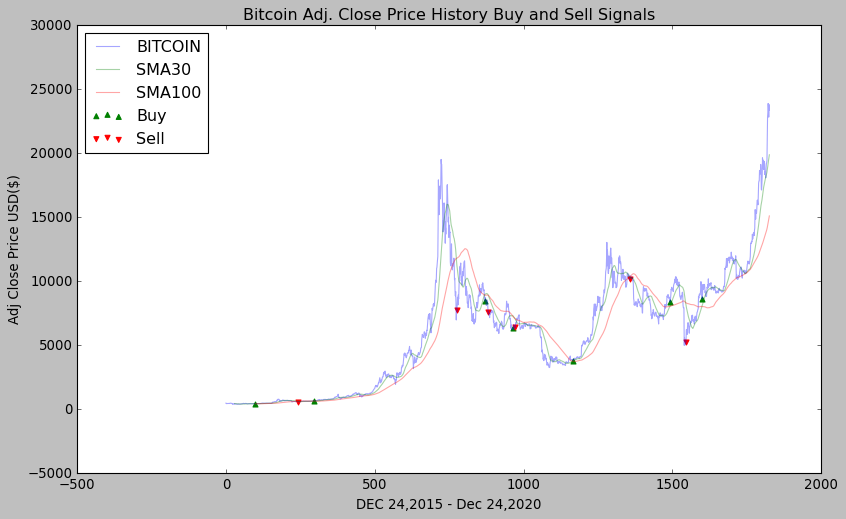

In [50]:
plt.style.use('classic')
plt.figure(figsize=(12,7))
plt.plot(data2['BTC'], label='BITCOIN', alpha=0.35)
plt.plot(data2['SMA30'], label='SMA30', alpha=0.35)
plt.plot(data2['SMA100'],label='SMA100', alpha=0.35)
plt.scatter(data2.index, data2['Buy Signal Price'], label ='Buy', marker='^',color='green')
plt.scatter(data2.index, data2['Sell Signal Price'],label='Sell', marker='v', color='red')
plt.title('Bitcoin Adj. Close Price History Buy and Sell Signals')
plt.xlabel("DEC 24,2015 - Dec 24,2020")
plt.ylabel("Adj Close Price USD($)")
plt.legend(loc='upper left')
plt.show()

---